In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #load
def preprocess(image, label):
    image = tf.expand_dims(image, -1)
    image = tf.image.resize(image, (224, 224))
    image = tf.tile(image, [1, 1, 3])
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label

ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(64)\
    .prefetch(tf.data.AUTOTUNE)

ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(64)\
    .prefetch(tf.data.AUTOTUNE)

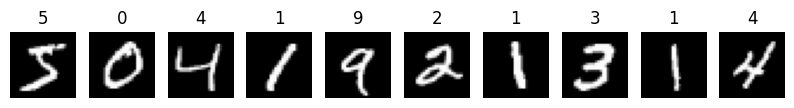

In [4]:
#see the images first 10
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [5]:
#let's create the model
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation = 'softmax')(x)
mobilenet_model = Model(inputs=base_model.input, outputs=output)

In [6]:
mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
mobilenet_model.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
938/938 [==============================] - 1327s 1s/step - loss: 0.3048 - accuracy: 0.9056 - val_loss: 0.1061 - val_accuracy: 0.9645
Epoch 2/5
938/938 [==============================] - 1916s 2s/step - loss: 0.1532 - accuracy: 0.9530 - val_loss: 0.0919 - val_accuracy: 0.9700
Epoch 3/5
938/938 [==============================] - 1894s 2s/step - loss: 0.1320 - accuracy: 0.9577 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 4/5
938/938 [==============================] - 2514s 3s/step - loss: 0.1105 - accuracy: 0.9651 - val_loss: 0.0721 - val_accuracy: 0.9770
Epoch 5/5
938/938 [==============================] - 2789s 3s/step - loss: 0.1072 - accuracy: 0.9654 - val_loss: 0.0737 - val_accuracy: 0.9774


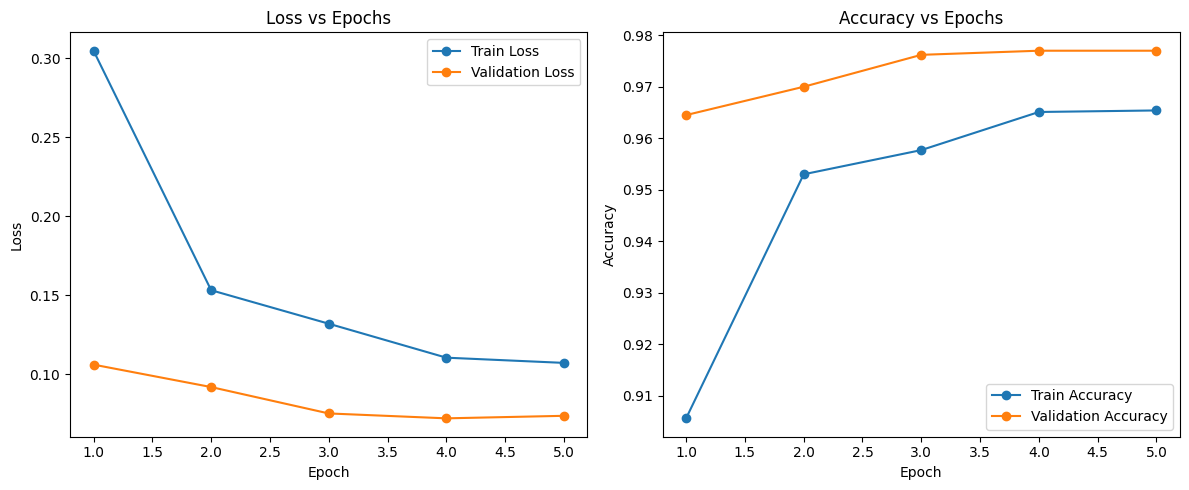

In [12]:

epochs = [1, 2, 3, 4, 5]
train_loss = [0.3048, 0.1532, 0.1320, 0.1105, 0.1072]
train_accuracy = [0.9056, 0.9530, 0.9577, 0.9651, 0.9654]
val_loss = [0.1061, 0.0919, 0.0752, 0.0721, 0.0737]
val_accuracy = [0.9645, 0.9700, 0.9762, 0.9770, 0.9770]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
#results
loss, accuracy = mobilenet_model.evaluate(ds_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

157/157 [==============================] - 225s 1s/step - loss: 0.0912 - accuracy: 0.9703
Test Loss: 0.0912
Test Accuracy: 0.9703
